# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Ana Javed

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [16]:
# Import libraries & packages required 
import pandas as pd
import numpy as np 
from scipy import stats
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import numpy.random as nr
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

# Declaring inline visualizations 
%matplotlib inline


In [17]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Reading file into a Pandas Dataframe 
Auto = pd.read_csv(fileName)

### Some Exploratory Data Analysis 
# print(Auto.describe()) # Summary Statistics

# print(Auto.shape) # DF dimensions

# Auto.head(5) # Top 5 rows


### 1. Compare and test Normality the distributions of price and log price Use both a graphical method and a formal test. Hint: Remember these relationships will always be approximate. Use the distribution that fits best for the rest of this exercise.

In [18]:
#### Creating New Column: Log Price

# Converting Unknown "?" Values in Price Column 
Auto.loc[:,'price'] = pd.to_numeric(Auto.loc[:,'price'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'price'])
Auto.loc[HasNan1,'price'] = np.nanmedian(Auto.loc[:,'price'])

## Creating New Log Price Column from Price Column
Auto.loc[:, "LogPrice"] = np.log(Auto.loc[:, "price"])

#### Verifying Output looks correct
# print(Auto.loc[:, "price"].value_counts()) 
# print(Auto.loc[:, "LogPrice"].value_counts()) 

Text(0.5, 0, 'Value')

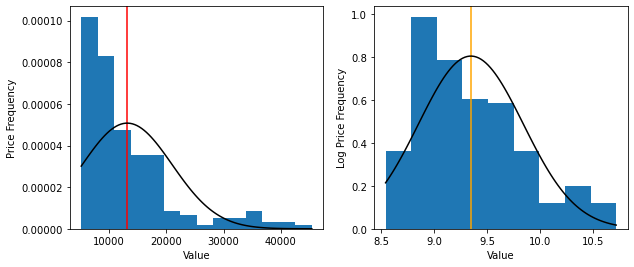

In [10]:
#### Creating a Histogram of Price and LogPrice Distributions 

plt.figure(figsize=(10, 9))

x = np.linspace(min(Auto.loc[:,'price']), max(Auto.loc[:,'price']), 100) #start, stop, num of samples 
x1 = np.linspace( min(Auto.loc[:,'LogPrice']), max(Auto.loc[:,'LogPrice']), 100) #start, stop, num of samples 

#### Testing Normality of Price Column 
plt.subplot(2, 2, 1) # The first plot # Rows, Column, Index 
plt.hist(Auto.loc[:,'price'], bins = "auto", density=True)
plt.axvline(mean(Auto.loc[:,'price']), color = 'red')

plt.plot(x, 
         norm.pdf(x, mean(Auto.loc[:,'price']), 
                  np.std(Auto.loc[:,'price'])), 
         color = 'black')

plt.ylabel('Price Frequency')
plt.xlabel('Value')


#### Testing Normality of Price Column 
plt.subplot(2,2, 2) # The next plot # nrows=1, ncols=1,
plt.hist(Auto.loc[:,'LogPrice'], bins = "auto", density=True)
plt.axvline(mean(Auto.loc[:,'LogPrice']), color = 'Orange')

plt.plot(x1, 
         norm.pdf(x1, mean(Auto.loc[:,'LogPrice']), 
                      np.std(Auto.loc[:,'LogPrice'])), 
         color = 'black')

plt.ylabel('Log Price Frequency')
plt.xlabel('Value')



### Histogram Plot Explanation

The left plot is a histogram the Automobile Price column. As we see, the mean is around 13150 and the data appears to be skewed to the right of the mean. The black line is a normal curve laid ontop of the distribution. It is cutoff on the left side. 

The right plot is a histogram the Automobile LogPrice column. As we see, the mean is around 9.3 and the data also appears to be skewed to the right of the mean. This distribution appears closer to a normal distribution, since the normal curve laid ontop of it is nearly a complete bell curve - but let's verify with statistics from conducting a t-test. 

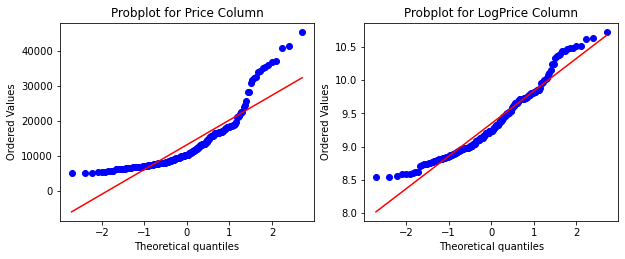

In [15]:
#### Creating a Q-Q Plot for a Normal Distribution

## Function to Create Q-Q Plot 
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    
    plt.figure(figsize=(10, 8)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1, dist ='norm') ## Plot the left subplot
    ax1.set_title("Probplot for Price Column")
    
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1, dist = 'norm') ## Plot the right subplot
    ax1.set_title("Probplot for LogPrice Column")
    
# Passing Price and LogPrice Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'price'], Auto.loc[:, 'LogPrice'])    


With these q-q plots, we visually see a greater distance at the top and bottom for Price column. The LogPrice column also has this curvature, but it is not as large. 

In [13]:
### Calculating the KS Statistics to exactly Measure the Maximum Distance 

def ks_test(dat, dist = 'norm'):  # KS Test Function 
    from scipy.stats import kstest 
    from sklearn.preprocessing import scale
    
    ks_statisic, pvalue = kstest(scale(dat), dist)  # Scaling/Normalizing Variable 
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
  

print("---- Price Column (After Normalizing): ----")
ks_test(Auto.loc[:, 'price'])  
print("\n")

print("---- LogPrice Column (After Normalizing): ----")
ks_test(Auto.loc[:, 'LogPrice'])  



---- Price Column (After Normalizing): ----
KS-statistic = 0.160931935149899
P-value = 4.174734746658962e-05


---- LogPrice Column (After Normalizing): ----
KS-statistic = 0.09982085789407613
P-value = 0.031318982399451856


### KS Statistic & P-value Analysis

For the Price column, we see that the KS statistic is small, and the P value is quite small. 

For the LogPrice column, we see that the KS statistic is smaller than the Price column, and the P value is small, but larger than the Price column's P value. 

When compared to each other (and assuming alpha = 0.05 or cutoff is 5%), each P-value is small enough to reject the null hypothesis that these distributions are the same as a normal distribution. 

When comparing the KS-statistic, which measures the maximum distance between the two cumulative density functions, the Price column has a larger value than LogPrice column. This means that there is a bigger difference in the Price column, so LogPrice column is closer to a normal distribution.

### 2. Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive.  Use both graphical methods and the formal test. 


In [14]:
### Defining Functions to assist conducting the T-test and Plotting Results 

## Histogram Plot 
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
## Confidence Interval on Histogram 
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
## Function to Plot T-Tests 
def plot_t(a, b, t_test, cols=['A', 'B'], nbins = 20):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7, 8))
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
## Function for Non-paired T Tests
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

DegFreedom    23.423234
Difference    -0.232111
Statistic     -2.017983
PValue         0.055188
Low95CI       -0.469812
High95CI       0.005591
dtype: float64


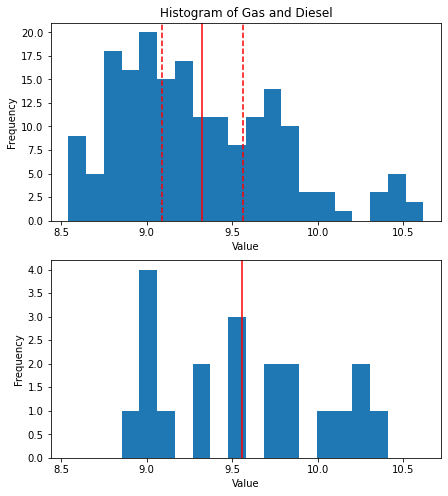

In [10]:
#### Paired T-Test LogPrice & Fuel-type

# Examining the different groups:
# print(Auto.loc[:, "fuel-type"].value_counts())
    # gas       185
    # diesel     20
    
# Separating the categories 
gas = Auto.loc[Auto.loc[:, 'fuel-type'] == 'gas', 'LogPrice']
diesel = Auto.loc[Auto.loc[:, 'fuel-type'] == 'diesel', 'LogPrice']

# Applying the t-test
Fuel_type = t_test(gas, diesel, alpha = 0.05)
print(Fuel_type)

# Plotting results in a histogram 
plot_t(gas, diesel, Fuel_type, cols=["Gas", "Diesel"]) 

DegFreedom    66.240183
Difference    -0.326451
Statistic     -4.416153
PValue         0.000038
Low95CI       -0.474032
High95CI      -0.178871
dtype: float64


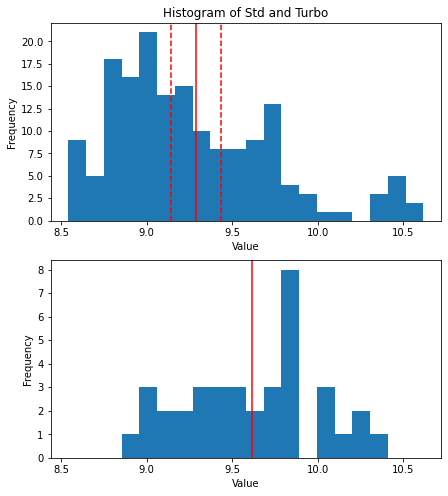

In [11]:
#### Paired T-Test LogPrice & Aspiration  + Historgram 

# Examining the different groups:
# print(Auto.loc[:, "aspiration"].value_counts())
#     # std      168
#     # turbo     37

# Separating the categories 
std = Auto.loc[Auto.loc[:, 'aspiration'] == 'std', 'LogPrice']
turbo = Auto.loc[Auto.loc[:, 'aspiration'] == 'turbo', 'LogPrice']

# Applying the t-test
Aspiration_type = t_test(std, turbo, alpha = 0.05)
print(Aspiration_type)

# Plotting results in a histogram 
plot_t(std, turbo, Aspiration_type, cols=["Std", "Turbo"]) 


DegFreedom    1.240960e+02
Difference   -7.075543e-01
Statistic    -1.217148e+01
PValue        6.500851e-23
Low95CI      -8.226133e-01
High95CI     -5.924954e-01
dtype: float64


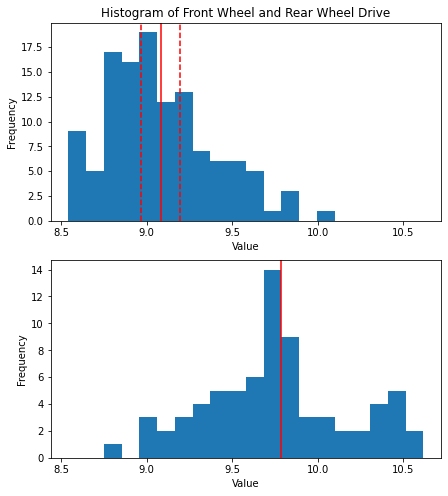

In [12]:
#### Paired T-Test LogPrice & Drive-wheels  

# Examining the different groups:
# print(Auto.loc[:, "drive-wheels"].value_counts())
    # fwd    120
    # rwd     76
    # 4wd      9
    
# Separating the categories 
fwd = Auto.loc[Auto.loc[:, 'drive-wheels'] == 'fwd', 'LogPrice']
rwd = Auto.loc[Auto.loc[:, 'drive-wheels'] == 'rwd', 'LogPrice']

# Applying the t-test
Drive_Wheels_type = t_test(fwd, rwd, alpha = 0.05)
print(Drive_Wheels_type)

# Plotting results in a histogram 
plot_t(fwd, rwd, Drive_Wheels_type, cols=["Front Wheel", "Rear Wheel Drive"]) 


#### Analysis of the 3 T-tests conducted above:


-- For Fuel Type, the t-test conducted on the gas and diesel groups showed a p-value of 0.055 which is larger than 0.05 cutoff, has a small t statistic, has a small difference in means, and the CI staddles 0. From this we cannot reject the null hypothesis. There is a good chance that the difference in price means between the groups is from random variation.


-- For Aspiration type, the t-test conducted on the std and turbo groups showed a small p-value of 0.00004, a small difference in means, a large t-statistic, and a CI that did not contain 0. From this we can reject the null hypothesis (since p < alpha) and there is a good chance that the difference in price means between the groups is not from random fluctuation. 



-- For Drive Wheels, the t-test conducted on the front wheel and rear wheel drive groups showed a very small p value, a small T-statistic, a small difference in the means, and the CI does not straddle 0. From this we can reject the null hypothesis (p < alpha) and there is a good chance that the difference in price means between the groups is not due to random variation.


### 3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the price (or log price, if closer to a Normal distribution) of autos stratified by body style.

Text(0.5, 1.0, 'Box Plot of Different Body Style Prices')

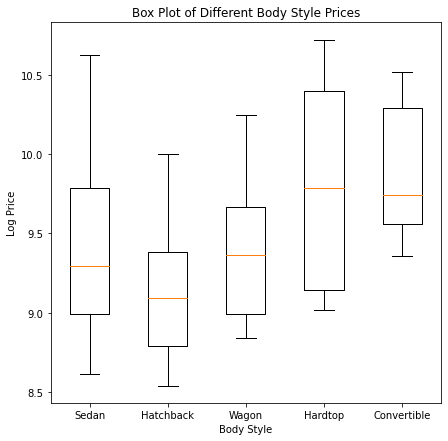

In [21]:
#### ANOVA & F-Statistic: LogPrice and Body Style

# Examining the different groups in the Body Style Column
# print(Auto.loc[:, "body-style"].value_counts())
    # sedan          96
    # hatchback      70
    # wagon          25
    # hardtop         8
    # convertible     6
    
## Separating out the Categories to their own dataset 
sedan = Auto.loc[Auto.loc[:, 'body-style'] == 'sedan', 'LogPrice']
hatchback = Auto.loc[Auto.loc[:, 'body-style'] == 'hatchback', 'LogPrice']
wagon = Auto.loc[Auto.loc[:, 'body-style'] == 'wagon', 'LogPrice']
hardtop = Auto.loc[Auto.loc[:, 'body-style'] == 'hardtop', 'LogPrice']
convertible = Auto.loc[Auto.loc[:, 'body-style'] == 'convertible', 'LogPrice']

## Quick Boxplot Visualization for the different categories 

plt.figure(figsize=(7, 7))
plt.boxplot([sedan, hatchback, wagon, hardtop, convertible], 
            labels = ["Sedan", "Hatchback", "Wagon", "Hardtop", "Convertible"])

plt.ylabel('Log Price')
plt.xlabel('Body Style')
plt.title('Box Plot of Different Body Style Prices')
    

In [22]:
## Calculating the F Statistic / ANOVA to determine if there is a statistically significant difference 

f_statistic, p_value = ss.f_oneway(sedan, hatchback, wagon, hardtop, convertible) 

print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 8.548650407843674
P-value = 2.180028605224779e-06


The F statistic is quite large and the p-value is very small. We can reject the null hypothesis that the 5 Body Style categories have the same mean or price. The probability of the differences being due to random chance is low. 

In [23]:
## Tukey HSD for Auto Body Styles 
body_styles = Auto.loc[:, ["body-style", "LogPrice"]]
body_styles.columns = ["bodystyle", "logprice"]

Tukey_HSD = pairwise_tukeyhsd(body_styles.logprice, body_styles.bodystyle)
print(Tukey_HSD)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------------
convertible   hardtop  -0.0966    0.9  -0.787  0.5937  False
convertible hatchback  -0.7596 0.0015 -1.3034 -0.2158   True
convertible     sedan  -0.4561 0.1384  -0.994  0.0819  False
convertible     wagon  -0.5399 0.0826  -1.121  0.0412  False
    hardtop hatchback   -0.663 0.0016 -1.1401 -0.1859   True
    hardtop     sedan  -0.3594 0.2227 -0.8298   0.111  False
    hardtop     wagon  -0.4433 0.1335 -0.9625   0.076  False
  hatchback     sedan   0.3035  0.001  0.1026  0.5045   True
  hatchback     wagon   0.2197 0.2551 -0.0781  0.5176  False
      sedan     wagon  -0.0838    0.9 -0.3709  0.2032  False
------------------------------------------------------------


When examining the pairwise groups CI intervals, there are three pairs that are truly different from each other and do not have zero included in the upper and lower CI range. 
These groupings are: 
- convertible and hatchback
- hardtop and hatchback
- hatchback and sedan

### 4. Graphically explore the differences between the price conditioned (grouped) by the categories of each variable. If any of these relationships are statistically significant, are they large enough to be important to your client? Is this importance evident in your graphics?
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


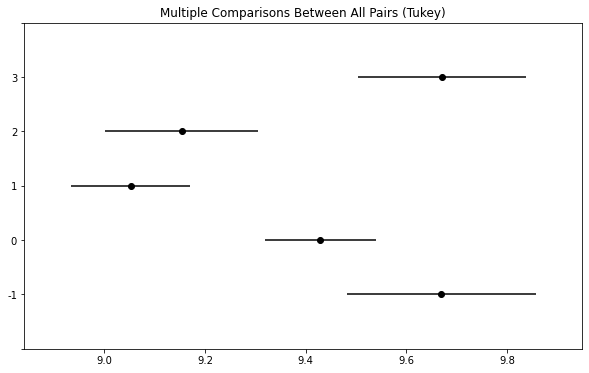

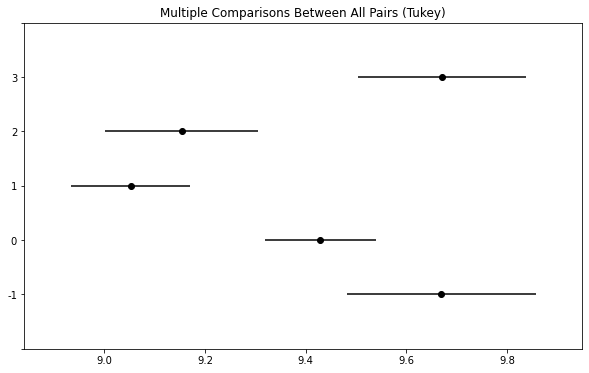

In [24]:
## Remaining categorical columns that we haven't explored yet are: 
## 'symboling', 'make', 'num-of-doors', 'engine-location', 'fuel-system'. I conduct analysis
## on all the columns above except engine-location, since it did not have enough "front" samples

## Examining unique values in the column
# print(Auto.loc[:, "symboling"].value_counts())
    #  0    67
    #  1    54
    #  2    32
    #  3    27
    # -1    22
    # -2     3
    
## Isolating the Columns needed 
Symboling = Auto.loc[:, ["symboling", "LogPrice"]]

## Removing -2 group since low number of samples
Symboling = Symboling[Symboling.symboling != -2]

## Tukey Visualtion of the different Groups: 
Tukey_HSD = pairwise_tukeyhsd(Symboling.LogPrice, Symboling.symboling)
# print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()


#### Stratifying Symboling Analysis

This visualization compares the different categories of symboling to the log price column in the data frame. According to this dataset's documentation, "a value of +3 indicates that the auto is risky, -3 that it is probably pretty safe". 

The means of the groups vary, indicated by the dot. Also the price ranges also vary for each category. The following group pairings are different from each other: 
- Group -1 and Group 1
- Group -1 and Group 2

- Group 0 and Group 1
- Group 0 and Group 2

- Group 1 and Group 3
- Group 2 and Group 3

These are a lot of groups that are different from each other, and they are all statistically significant since their adjusted p-score is under the 0.05 cutoff. I would suggest to explore these categories relationships to my clients since a relationship is present. 

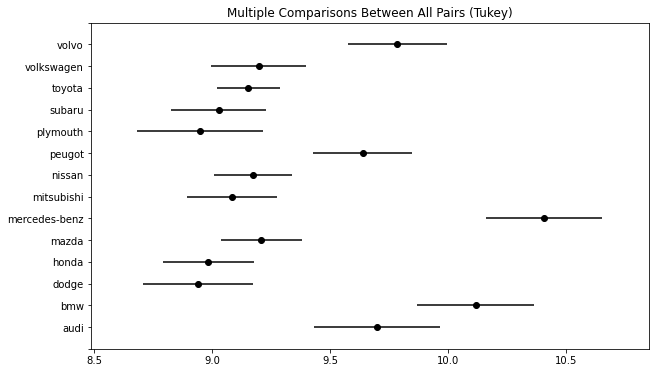

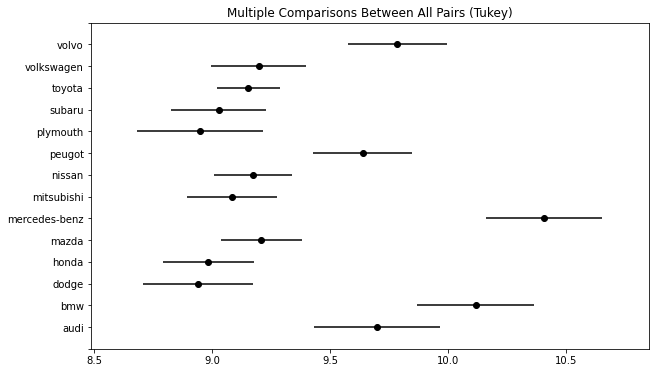

In [25]:
## Examining unique values in the Make column
# print(Auto.loc[:, "make"].value_counts())

    # toyota           32
    # nissan           18
    # mazda            17
    # mitsubishi       13
    # honda            13
    # subaru           12
    # volkswagen       12
    # peugot           11
    # volvo            11
    # dodge             9
    # bmw               8
    # mercedes-benz     8
    # audi              7
    # plymouth          7
    # saab              6
    # porsche           5
    # isuzu             4
    # jaguar            3
    # alfa-romero       3
    # chevrolet         3
    # renault           2
    # mercury           1

    
## Isolating the Columns needed 
df = Auto.loc[:, ["make", "LogPrice"]]

## Removing groups with low number of samples
df = df[df.make != 'mercury']
df = df[df.make != 'renault']
df = df[df.make != 'chevrolet']
df = df[df.make != 'alfa-romero']
df = df[df.make != 'jaguar']
df = df[df.make != 'isuzu']
df = df[df.make != 'porsche']
df = df[df.make != 'saab']

## Tukey Visualtion of the different Groups: 
Tukey_HSD = pairwise_tukeyhsd(df.LogPrice, df.make)
# print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()



#### Stratifying Make Analysis 

There were multiple makes that had under 7 samples, so those 8 categories had been removed. From the table and graph, we can see that there are multiple groups that are significantly different from each other. They are:
- Audi and Dodge
- Audi and Honda
- Audi and Mazda
- Audi and mercedes-benz
- Audi and mitsubishi
- Audi and Nissan
- Audi and plymouth
- Audi and subaru
- Audi and toyota
- Audi and volkswagen
- bmw and dodge
- bmw and honda
- bmw and mazda 
- bmw and mitsubishi
- bmw and nissan 
- bmw and peugot 
- bmw and plymouth 
- bmw and subaru 
- bmw and toyota 
- bmw and volkswagen 
- dodge and mitsubishi 
- dodge and peugot 
- dodge and volkswagen
- honda and mercedes-benz 
- honda and peugot
- honda and volvo
- mazda and mercedes-benz
- mazda and peugot
- mazda and volvo
- mercedes-benz and mitsubishi
- mercedes-benz and nissan
- mercedes-benz and peugot
- mercedes-benz and plymouth
- mercedes-benz and subaru
- mercedes-benz and toyota
- mercedes-benz and volkswagen
- mercedes-benz and volvo
- mitsubishi and peugot
- mitsubishi and volvo
- nissan and peugot
- nissan and volvo 
- peugot and plymouth
- peugot and subaru
- peugot and toyota
- plymouth and volvo
- subaru and volvo
- toyota and volvo
- volkswagen and volvo

There is certainly a patter and trend which vehicles are more likely to be related than others. In the Tukey HSD plot it is apparent that there are groups of cars that are in the same price range of each other than other cars, indicating a correlation of automobile make and price. 

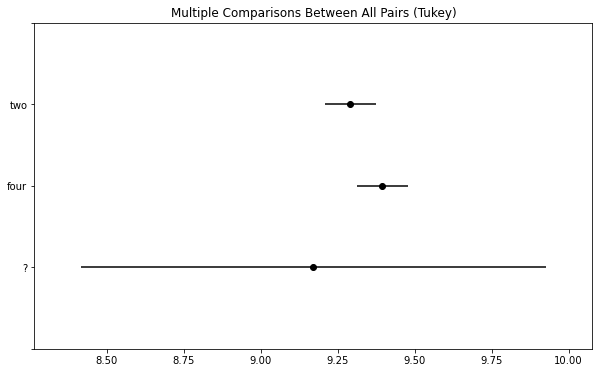

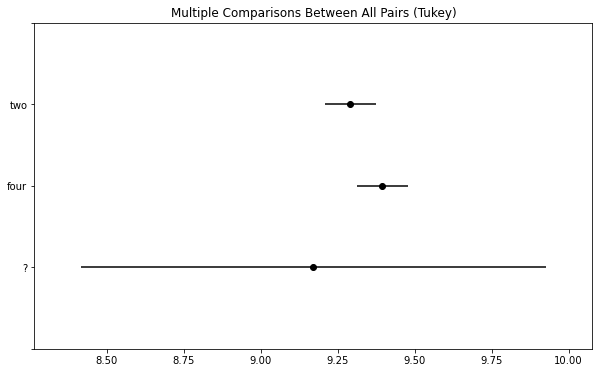

In [26]:
## Examining unique values in the Number of Doors column
# print(Auto.loc[:, "num-of-doors"].value_counts())
    # four    114
    # two      89
    # ?         2
    
## Isolating the Columns needed 
df = Auto.loc[:, ["num-of-doors", "LogPrice"]]
df.columns = ["numofdoors", "logprice"]

# ## Tukey Visualtion of the different Groups: 
Tukey_HSD = pairwise_tukeyhsd(df.logprice, df.numofdoors)
# print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()


#### Stratifying Number of Door Analysis

The number of doors on a car do not contain statistically significant differences in prices. This is evident by the two and four CI overlapping and having p scores above the cutoff. I would not recommend further examining this attribute to my organization to identify potential correlation with prices. 

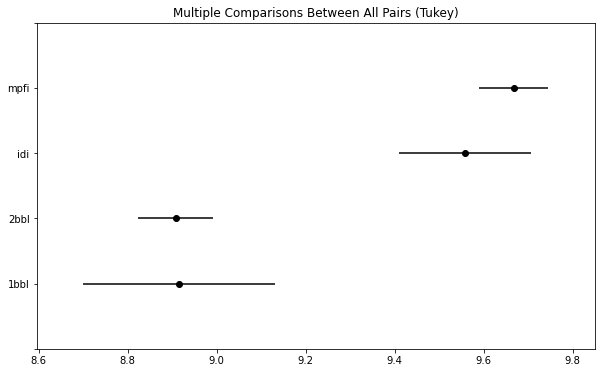

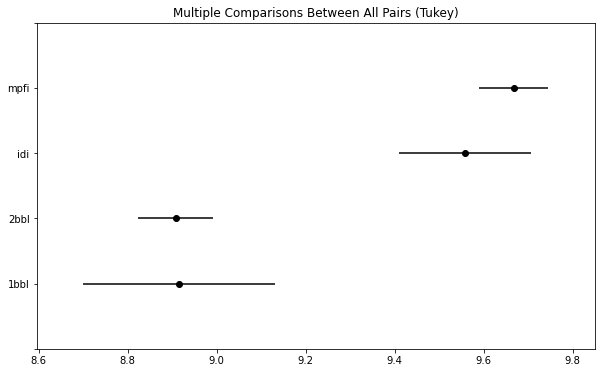

In [27]:
## Examining unique values in Fuel System column
# print(Auto.loc[:, "fuel-system"].value_counts())
        # mpfi    94
        # 2bbl    66
        # idi     20
        # 1bbl    11
        # spdi     9
        # 4bbl     3
        # spfi     1
        # mfi      1
    
## Isolating the Columns needed 
df = Auto.loc[:, ["fuel-system", "LogPrice"]]
df.columns = ["fuelsystem", "logprice"]

## Removing categories with small sample size
df = df[df.fuelsystem != 'mfi']
df = df[df.fuelsystem != 'spfi']
df = df[df.fuelsystem != '4bbl']
df = df[df.fuelsystem != 'spdi']

## Tukey Visualtion of the different Groups: 
Tukey_HSD = pairwise_tukeyhsd(df.logprice, df.fuelsystem)
# print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()


#### Stratifying Fuel Systems Analysis

The Tukey HSD plot displays a subgrouping within the categories. mpfi and idi are similar prices to each other, and 2bbl and 1bbl have similar prices to each other. Thus, the following groups are identified as being significantly different from each other: 

- 1bbl    idi
- 1bbl   mpfi
- 2bbl    idi
- 2bbl   mpfi

Since these groups are different from each other and there is a low chance this is from random fluctuation, I would recommend to my client/organization to look into an automobile's fuel system as it relates to price. 